### Script to
1. Seaprate consistent and inconsistent by thresholding AAA
2. Seggregate inconsistent pairs into further subclasses based on features extracted in previous script using kmeans 
3. Save curve classification labels to create Dr/CL/Ti maps in next script.


In [1]:
__author__ = 'Aanchal'

In [2]:
import pandas as pd
import FUNCTIONS as f
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from shutil import copyfile
from os.path import isfile, join, exists
from os import listdir, mkdir
from scipy.stats import pearsonr
import numpy as np
#import seaborn as sns
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import pairwise_distances
import scipy.cluster.hierarchy as sch
from sklearn import metrics

In [9]:
#NEW: flat+nu29
src_folder='../figures/FittedCurves_commonPairs_plots/'
dest_folder='../figures/FittedCurves_commonPairs_plots/SeparationUsingMethod2/'
FeatureMatrix=pd.read_csv('../data_processed/FittedCurvesCommonPairs_features/Feature_Matrix_FLatPerDrugFitting_15features.csv')#_without5dosageDrugs.csv') # #Normalized_outliersCapped

# Beow code for withour 5 dosage drugs features (generated on dec 5, 2019)
#datasets_list=['CCLE','GDSC']
#rawFileDir="../data/"

datasets_list=['CCLE','GDSC1replicatesSummarized']
rawFileDir="../data/data_2019_12_05/"

FeatureMatrix=FeatureMatrix.rename(columns={'IS':'Adjsuted_Approximated_Area'})
combined=FeatureMatrix

### A. Separate concordant pairs first by thresholding area between fitted curves

In [10]:
aaa=FeatureMatrix[['Adjsuted_Approximated_Area']]

In [11]:
FeatureMatrix['Sensitivity'] = np.where(FeatureMatrix['ic50_mode']>=FeatureMatrix['log2(max_dosage_bothDatasets)'], 1, 0)

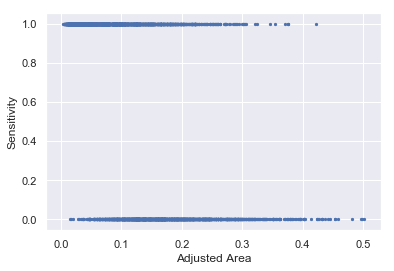

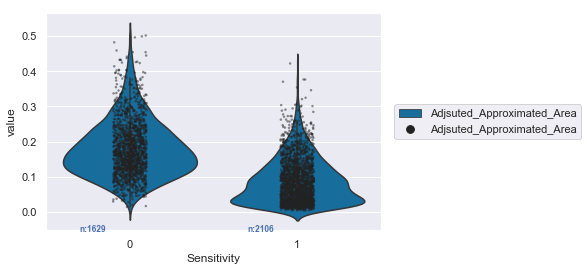

In [12]:
plt.scatter(FeatureMatrix['Adjsuted_Approximated_Area'],FeatureMatrix['Sensitivity'],s=5, alpha=1)#)c=FeatureMatrix['mae_fitness']
plt.xlabel('Adjusted Area')
plt.ylabel('Sensitivity')
plt.show()
f.clusteringBoxplot(FeatureMatrix, 'Sensitivity', 'Adjsuted_Approximated_Area', 'class_',-0.06, 1)

In [13]:
FeatureMatrix

,Standard cell line name,Standard drug name,HDI_mindosage,HDI_ab_dosage,HDI_middosage,HDI_bc_dosage,HDI_maxdosage,HDI_ic50,HDI_m,Area_between_fitted_curves_5dosages,m_mode,ic50_mode,mae_fitness,width,log2(min_dosage_bothDatasets),log2(max_dosage_bothDatasets),Adjsuted_Approximated_Area,Sensitivity
0,22RV1,Nilotinib,0.002426,0.005650,0.013990,0.039161,0.165758,20.040970,1.890230,0.415955,0.486070,11.325927,0.167565,11.643856,-8.643856,3.000000,0.035723,1
1,22RV1,Selumetinib,0.193853,0.196574,0.183353,0.186264,0.266531,15.413213,0.309432,2.318241,0.143434,5.827724,0.139122,11.643856,-8.643856,3.000000,0.199096,1
2,22RV1,Nutlin-3a,0.010427,0.026046,0.064362,0.148200,0.275634,3.320041,1.274590,1.110936,0.851377,3.535129,0.075539,11.643856,-8.643856,3.000000,0.095410,1
3,22RV1,Palbociclib,0.129242,0.179996,0.228332,0.272591,0.443303,9.105279,0.647930,2.815461,0.354280,2.543526,0.153789,11.643856,-8.643856,3.000000,0.241798,0
4,22RV1,PD0325901,0.175761,0.179537,0.171550,0.222212,0.348005,12.397516,0.311910,2.714341,0.202737,2.573674,0.113544,13.000000,-10.000000,3.000000,0.208795,0
5,22RV1,Tanespimycin,0.034002,0.094562,0.232625,0.338196,0.314477,2.325434,1.147841,2.444113,0.825627,0.091597,0.114448,11.643856,-8.643856,3.000000,0.209906,0
6,22RV1,PLX-4720,0.012337,0.022906,0.043091,0.089492,0.257659,17.263353,1.591559,0.868976,0.526606,6.669559,0.116826,11.965784,-8.643856,3.321928,0.072622,1
7,22RV1,Panobinostat,0.135091,0.251780,0.105962,0.016220,0.002273,0.988890,1.005521,1.288521,1.247915,-6.131590,0.064676,11.643856,-8.643856,3.000000,0.110661,0
8,42-MG-BA,Selumetinib,0.121585,0.151563,0.172399,0.184986,0.274792,15.175882,0.442290,2.058452,0.189853,5.740565,0.134802,11.643856,-8.643856,3.000000,0.176784,1
9,42-MG-BA,Nutlin-3a,0.023178,0.036070,0.057833,0.094532,0.174375,19.709553,1.770027,0.836063,0.337036,9.177279,0.160876,11.643856,-8.643856,3.000000,0.071803,1


In [14]:

import scipy.stats as stats
aaa_sensitive_pairs=FeatureMatrix[FeatureMatrix['Sensitivity']==0]['Adjsuted_Approximated_Area']
aaa_resistant_pairs=FeatureMatrix[FeatureMatrix['Sensitivity']==1]['Adjsuted_Approximated_Area']
stats.ttest_ind(a=aaa_sensitive_pairs,b=aaa_resistant_pairs,equal_var=True)

Ttest_indResult(statistic=38.63525149018286, pvalue=5.247437680748491e-275)

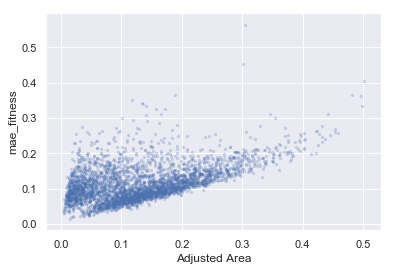

In [15]:
plt.scatter(FeatureMatrix['Adjsuted_Approximated_Area'],FeatureMatrix['mae_fitness'],s=5, alpha=0.2)#)
plt.xlabel('Adjusted Area')
plt.ylabel('mae_fitness')
plt.show()

In [16]:
FeatureMatrix=FeatureMatrix.sort_values(['Standard cell line name', 'Standard drug name'])
FeatureMatrix

,Standard cell line name,Standard drug name,HDI_mindosage,HDI_ab_dosage,HDI_middosage,HDI_bc_dosage,HDI_maxdosage,HDI_ic50,HDI_m,Area_between_fitted_curves_5dosages,m_mode,ic50_mode,mae_fitness,width,log2(min_dosage_bothDatasets),log2(max_dosage_bothDatasets),Adjsuted_Approximated_Area,Sensitivity
0,22RV1,Nilotinib,0.002426,0.005650,0.013990,0.039161,0.165758,20.040970,1.890230,0.415955,0.486070,11.325927,0.167565,11.643856,-8.643856,3.000000,0.035723,1
2,22RV1,Nutlin-3a,0.010427,0.026046,0.064362,0.148200,0.275634,3.320041,1.274590,1.110936,0.851377,3.535129,0.075539,11.643856,-8.643856,3.000000,0.095410,1
4,22RV1,PD0325901,0.175761,0.179537,0.171550,0.222212,0.348005,12.397516,0.311910,2.714341,0.202737,2.573674,0.113544,13.000000,-10.000000,3.000000,0.208795,0
6,22RV1,PLX-4720,0.012337,0.022906,0.043091,0.089492,0.257659,17.263353,1.591559,0.868976,0.526606,6.669559,0.116826,11.965784,-8.643856,3.321928,0.072622,1
3,22RV1,Palbociclib,0.129242,0.179996,0.228332,0.272591,0.443303,9.105279,0.647930,2.815461,0.354280,2.543526,0.153789,11.643856,-8.643856,3.000000,0.241798,0
7,22RV1,Panobinostat,0.135091,0.251780,0.105962,0.016220,0.002273,0.988890,1.005521,1.288521,1.247915,-6.131590,0.064676,11.643856,-8.643856,3.000000,0.110661,0
1,22RV1,Selumetinib,0.193853,0.196574,0.183353,0.186264,0.266531,15.413213,0.309432,2.318241,0.143434,5.827724,0.139122,11.643856,-8.643856,3.000000,0.199096,1
5,22RV1,Tanespimycin,0.034002,0.094562,0.232625,0.338196,0.314477,2.325434,1.147841,2.444113,0.825627,0.091597,0.114448,11.643856,-8.643856,3.000000,0.209906,0
9,42-MG-BA,Nutlin-3a,0.023178,0.036070,0.057833,0.094532,0.174375,19.709553,1.770027,0.836063,0.337036,9.177279,0.160876,11.643856,-8.643856,3.000000,0.071803,1
10,42-MG-BA,PD0325901,0.052883,0.090218,0.158159,0.235353,0.434736,7.392944,0.819236,2.364502,0.471325,2.924043,0.092807,13.000000,-10.000000,3.000000,0.181885,0


#### A1. Chose threshold

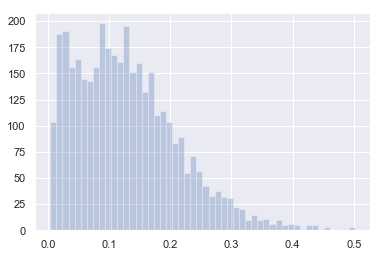

In [17]:
from pylab import hist #https://stackoverflow.com/questions/35990467/fit-two-gaussians-to-a-histogram-from-one-set-of-data-python
data=aaa.dropna().values.flatten()
yh,xh,_=hist(data,50,alpha=.3,label='data')

mu, sigma, Amp for 2 modes=> [1.38939472e-01 3.54195601e-02 3.04865994e+01 6.31929940e-02
 1.24093416e-01 1.61814764e+02]
Th=mu+std of 2nd gaussian pofile: 0.18728641028114798


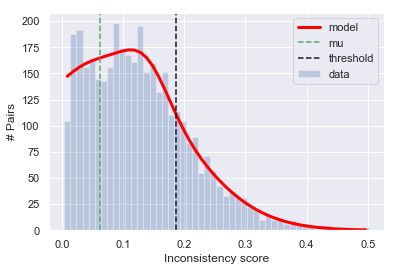

In [22]:
[mus,stds, params,xh,yh] = f.fit_mixtureOfGaussians(FeatureMatrix[['Adjsuted_Approximated_Area']])

#st_ind=np.where(params==max(mus))
th=mus[1]+stds[1]
plt.axvline(x=mus[1], color='g', linestyle='--', label='mu')
plt.legend(loc='upper right');
plt.axvline(x=th ,color='k', linestyle='--', label='threshold')
plt.legend(loc='upper right');
plt.xlabel('Inconsistency score')
plt.ylabel('# Pairs')
print("Th=mu+std of 2nd gaussian pofile:", th)
plt.savefig('../figures/ClassifyPairs_method2/IS_distibution.svg')

In [23]:
th

0.18728641028114798

#### A2. Threshold ABFC to filter out consistent pairs

In [24]:
import FUNCTIONS as f

In [25]:
features='Adjsuted_Approximated_Area'

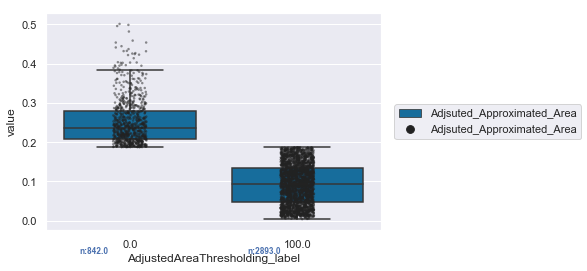

In [26]:
superalgofoldername=''
algo='AdjustedAreaThresholding'
level=''
letter='A'
ypos=- 0.09
FM=combined[features]

cluster_labels=100+np.zeros(len(aaa)) # GIVE LABEL 100 TO CONCORDANT PAIRS
cluster_labels[ (combined[features]) >=th] =0
k=2

#[k, cluster_labels]=f.cluster(algo, FM)

combined[algo+'_'+level+'label']=cluster_labels

#f.copyPastePlots(src_folder, dest_folder, algo,superalgofoldername, level, k, combined) 
                
f.clusteringBoxplot(combined, algo+'_'+level+'label', features,letter,ypos,0)
plt.savefig('../figures/ClassifyPairs_method2/level1_bp.svg', bbox_inches='tight')

In [27]:
algo='AdjustedAreaThresholding'
level=''
k=2 #(concordant and disconcordant class)

### B. sub-cluster Diconcordant pairs using MS to 

In [28]:
combined_disc = combined [combined[algo+'_'+level+'label'] == 0]

superalgofoldername=algo+'_k='+str(k)+'/'
algo='kmeans'#'MeanShift'
level='Sub_'
letter='B'
ypos= -0.055

combined[algo+'_'+level+'label']=np.zeros(len(combined))


In [29]:
features=['HDI_mindosage','HDI_ab_dosage','HDI_middosage','HDI_bc_dosage','HDI_maxdosage']#,'HDI_m'],['HDI_mindosage','HDI_middosage','HDI_maxdosage','HDI_m','HDI_ic50']]


In [30]:
########FINALLLL k= 4, even if k=5 slightly beteer SI but itss splitting closed group into 2..no use#######################################

CLUSTERING METHOD : No of classes= kmeans :  4


c:\python36\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Silhouette score= 0.332988211544977


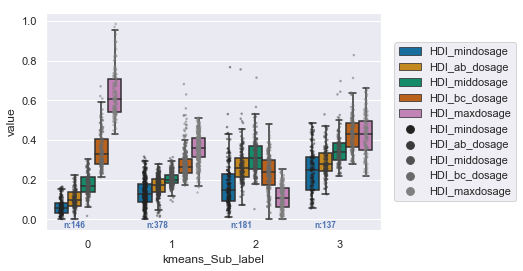

In [31]:
algo='AdjustedAreaThresholding'
level=''
k=2 #(concordant and disconcordant class)
combined_disc = combined [combined[algo+'_'+level+'label'] == 0]
superalgofoldername=algo+'_k='+str(k)+'/'
algo='kmeans'#'MeanShift'
level='Sub_'
letter='B'
ypos= -0.055
combined[algo+'_'+level+'label']=np.zeros(len(combined))

k=4
#combined_disc=combined_disc[features]

[k, cluster_labels]=f.cluster(algo, combined_disc[features], k)
        
print("CLUSTERING METHOD : No of classes= "+algo+" : ",str(k) ) 
        
combined_disc[ algo+'_'+level+'label']= cluster_labels
        
#f.copyPastePlots(src_folder, dest_folder, algo,superalgofoldername, level,k,  combined_disc) #create folders and copy paste FILES from source folder to a fodler corresponding to each cluster 
        
f.clusteringBoxplot(combined_disc, algo+'_'+level+'label', features,letter,  ypos,0)
print('Silhouette score=',metrics.silhouette_score(combined_disc[features], cluster_labels))
plt.savefig('../figures/ClassifyPairs_method2/level2_bp.svg', bbox_inches='tight')

#### we set k=4 above since we expect 4 types of curves; if we want to pick k based on silouette index..run the code below

In [32]:
'''algo='AdjustedAreaThresholding'
level=''
k=2 #(concordant and disconcordant class)
combined_disc = combined [combined[algo+'_'+level+'label'] == 0]
superalgofoldername=algo+'_k='+str(k)+'/'
algo='kmeans'#'MeanShift'
level='Sub_'
letter='B'
ypos= -0.055
combined[algo+'_'+level+'label']=np.zeros(len(combined))


k=0
#combined_disc=combined_disc[features]

[k, cluster_labels]=f.cluster(algo, combined_disc[features], k)
        
print("CLUSTERING METHOD : No of classes= "+algo+" : ",str(k) ) 
        
combined_disc[ algo+'_'+level+'label']= cluster_labels
        
#f.copyPastePlots(src_folder, dest_folder, algo,superalgofoldername, level,k,  combined_disc) #create folders and copy paste FILES from source folder to a fodler corresponding to each cluster 
        
f.clusteringBoxplot(combined_disc, algo+'_'+level+'label', features,letter,  ypos,0)
print('Silhouette score=',metrics.silhouette_score(combined_disc[features], cluster_labels))'''

'algo=\'AdjustedAreaThresholding\'\nlevel=\'\'\nk=2 #(concordant and disconcordant class)\ncombined_disc = combined [combined[algo+\'_\'+level+\'label\'] == 0]\nsuperalgofoldername=algo+\'_k=\'+str(k)+\'/\'\nalgo=\'kmeans\'#\'MeanShift\'\nlevel=\'Sub_\'\nletter=\'B\'\nypos= -0.055\ncombined[algo+\'_\'+level+\'label\']=np.zeros(len(combined))\n\n\nk=0\n#combined_disc=combined_disc[features]\n\n[k, cluster_labels]=f.cluster(algo, combined_disc[features], k)\n        \nprint("CLUSTERING METHOD : No of classes= "+algo+" : ",str(k) ) \n        \ncombined_disc[ algo+\'_\'+level+\'label\']= cluster_labels\n        \n#f.copyPastePlots(src_folder, dest_folder, algo,superalgofoldername, level,k,  combined_disc) #create folders and copy paste FILES from source folder to a fodler corresponding to each cluster \n        \nf.clusteringBoxplot(combined_disc, algo+\'_\'+level+\'label\', features,letter,  ypos,0)\nprint(\'Silhouette score=\',metrics.silhouette_score(combined_disc[features], cluster_lab

### C. Combine results! : helps to see what percentage of total common pairs is disconcordant

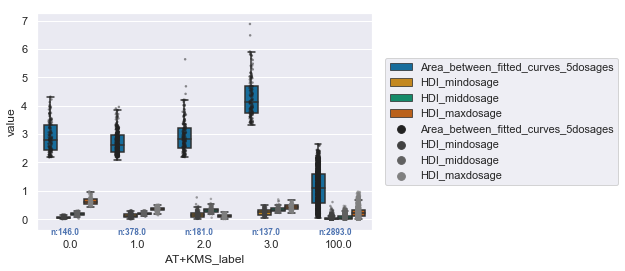

In [33]:
ypos=-0.6
letter='Class_'
df=pd.concat([ combined [combined['AdjustedAreaThresholding_label'] == 100],combined_disc ], axis=0)
df['AT+KMS_label']=df['AdjustedAreaThresholding_label'] +df['kmeans_Sub_label']
f.clusteringBoxplot(df, 'AT+KMS_label',['Area_between_fitted_curves_5dosages','HDI_mindosage','HDI_middosage','HDI_maxdosage'],letter,  ypos,0)


In [34]:
df.to_csv('../data_processed/ClassifyPairs_method2/Clustering_labels_NewFittedCurves_FLatPerDrugFitting_AreaThresholding+Kmeans.csv' , index=False)